**1.a)** Blue line represents (y=x) linear equation. Plotted the scores of section A on x-axis and scores of 
section B on y-axis and plotted the trend line as red. As we can see from the plot, most of the section B 
scores (15/23) are on or above the blue line. This implies that section B has performed better.

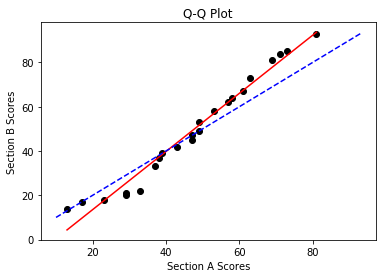

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

a_scores = [47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29]
b_scores = [20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21]
a_scores.sort()
b_scores.sort()

plt.xlabel("Section A Scores")
plt.ylabel("Section B Scores")
plt.title("Q-Q Plot")
plt.plot(a_scores, b_scores, 'o', color='black')

z = np.polyfit(a_scores, b_scores, 1)
p = np.poly1d(z)

plt.plot(a_scores, p(a_scores), '-', color='red')

x_ref = [10, 93]
y_ref = [10, 93]
p_ref = np.poly1d(np.polyfit(x_ref, y_ref, 1))

plt.plot(x_ref, p_ref(x_ref), '--', color='blue')
plt.show()

# Can also be done using qqplot_2samples of statsmodel api
# sm.qqplot_2samples(np.asarray(b_scores), np.asarray(a_scores), line='45', xlabel="Section A scores", ylabel="Section B Scores")

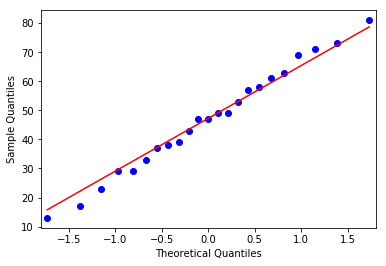

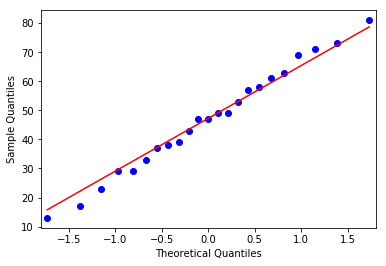

In [44]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

a_scores = [47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29]
# q-q plot of Section A Scores
sm.qqplot(np.asarray(a_scores), line='q')


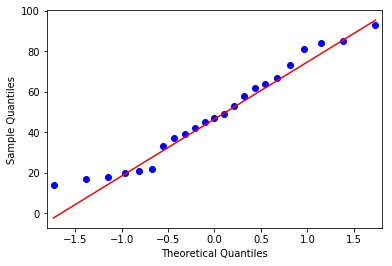

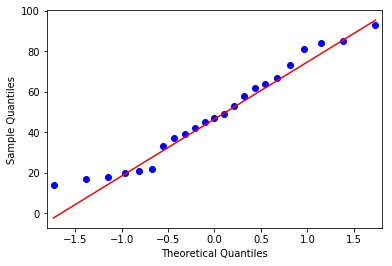

In [45]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
b_scores = [20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21]
# q-q plot of Section B Scores
sm.qqplot(np.asarray(b_scores), line='q')

1.b) As we can see above, scores of Section A are closely matching to the theoretical normal 
distribution samples than the scores of Section B.

**2.a) Equation for accuracy in terms of Specificity and Sensitivity can be derived for these 3 assumptions.**

**1.Number of positive and negative samples are equal**
```
Let's consider,
Total positive samples = P
Total negative samples = N

Positive samples are distributed between TP and FN
FN = P - TP
Similarly, negative samples are distributed between FP and TN
FP = N - TN

Sensitivity = TP/(TP + FN)
            = TP/(TP + P - TP)
            = TP/P
Specificity = TN/(TN + FP)
            = TN/(TN + N - TN)
            = TN/N
Accuracy = (TP + TN)/(P + N)

As the assumption is that positive and negative samples are equal
P = N

Accuracy = (TP + TN)/2P
         = 1/2(TP/P + TN/N)
         = 1/2(Sensitivity + Specificity)
Therefore, 
Accuracy = 1/2(Sensitivity + Specificity)
```

**2. All samples are positive**
```
As there are no negative samples in this case,
(N = 0) =>
(TN + FP) = 0 =>
(TN = 0 and FP = 0)

Also P = TP + FN

Accuracy = TP/(TP + FN) => TP/P
Sensitivity = TP/(TP+FN)
            = TP/P
Specificity = 0

Therefore,
Accuracy = Sensitivity
```

**3. All samples are negative**
```
As there are no positive samples in this case,
(P = 0) =>
(TP + FN) = 0 =>
(TP = 0 and FN = 0)

Also N = TN + FP

Accuracy = TN/N
Specificity = TN/(FP+TN)
            = TN/N
Sensitivity = 0

Therefore,
Accuracy = Specificity
```

**2.b)** I have implemented **Naive Bayes and Logistic Regression algorithms** on the **Indian Liver Patient Records dataset** 

**Import dataset and validate the data**  

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, pairwise_distances

df = pd.read_csv('indian_liver_patient.csv')
# Lets see if we can load the csv and check the column labels
print(df.head())
# Check the data types for features
print(df.info())
# Gender column is defined as an object. Convert it into number. i.e, Male => 1, Female => 0
df = df.replace({'Gender': {'Male': 1, 'Female': 0} })
# Check if there are any null values in the dataset
print(df.isnull().sum())
# As there are 4 missing values in Albumin_and_Globulin_Ratio, lets fill this with the mean values of the feature
mean = np.mean(df['Albumin_and_Globulin_Ratio'])
# Lets fill the missing values with the mean calculated above
df = df.fillna({'Albumin_and_Globulin_Ratio': mean})
# confirm that there are no missing values after filling them with mean
print(df.isnull().sum())
y = df['Dataset']
X = df.drop('Dataset', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=df['Dataset'])

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

**Logistic Regression Implementation**

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predicted = logreg.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, predicted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("\nClassification Report:")
print(classification_report(y_test, predicted))


Accuracy Score:
0.7257142857142858

Confusion Matrix:
[[117   8]
 [ 40  10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83       125
           2       0.56      0.20      0.29        50

   micro avg       0.73      0.73      0.73       175
   macro avg       0.65      0.57      0.56       175
weighted avg       0.69      0.73      0.68       175



**Gaussian Naive Bayes Implementation**

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted = gnb.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, predicted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("\nClassification Report:")
print(classification_report(y_test, predicted))


Accuracy Score:
0.5314285714285715

Confusion Matrix:
[[45 80]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.36      0.52       125
           2       0.38      0.96      0.54        50

   micro avg       0.53      0.53      0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



**Todo: Writeup the performance characteristics comparisions**

**3b. Naive Bayes implementation from scratch**

In [49]:
import pandas as pd
import math

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample


def gaussian_probability(sample, mean, sd):
    return (1 / math.sqrt(2 * math.pi) * sd) * math.exp(-(math.pow(sample - mean, 2) / (2 * math.pow(sd, 2))))


def calculate_probability(x, mean, stdev):
    exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent


def mean(column):
    return sum(column) / float(column.count())


def sd(column, column_mean):
    a = sum([math.pow(val - column_mean, 2) for val in column])
    return math.sqrt(a/float(column.count()))


def summary(column):
    column_mean = mean(column)
    column_sd = sd(column, column_mean)
    column_size = column.count()
    return column_mean, column_sd, column_size


def summaries(df):
    return [summary(df[column]) for column in df]
    # return [(df[column].mean(), df[column].std(), df[column].count()) for column in df]


def test(record, summary):
    probability = 1
    for index in range(len(summary)):
        normal_prob = gaussian_probability(record[1].iloc[index], summary[index][0], summary[index][1])
        probability *= normal_prob
    return probability


def predict(record, positive_summary, negative_summary):
    total_count = positive_summary[0][2] + negative_summary[0][2]
    positive_probability = float(positive_summary[0][2]) / total_count * test(record, positive_summary)
    negative_probability = float(negative_summary[0][2]) / total_count * test(record, negative_summary)
    if positive_probability > negative_probability:
        return 1
    else:
        return 0


def predict_test_dataset(model, X):
    return [predict(row, model[0], model[1]) for row in X.iterrows()]


def fit(train_positive, train_negative):
    positive_class_summaries = summaries(train_positive)
    negative_class_summaries = summaries(train_negative)
    return positive_class_summaries, negative_class_summaries


def main():
    df = pd.read_csv('bc.csv', index_col=0)
    # Drop rows with missing values (nan) if any
    df = df.dropna()
    # Drop Id Column
    df = df.drop(columns='Id')

    # Rename all of the columns, keeping them in order
    df.columns = ['Cl_thickness', 'Cell_size', 'Cell_shape', 'Marg_adhesion', 'Epith_c_size',
                  'Bare_nuclei', 'Bl_cromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

    # Check Class label value counts. This shows how imbalanced the data is.
    print("\n\nClass label value counts to identify the balance in the dataset")
    print(df['Class'].value_counts())

    # Convert Class String values from (benign => 0) and (malignant => 1)
    df["Class"] = df["Class"].map({"benign": 0, "malignant": 1})

    # Split the data into Training(70%) and Test(30%) data.
    train, test = train_test_split(df, test_size=0.30, random_state=100, stratify=df['Class'])
    train_df = pd.DataFrame(train)
    test_df = pd.DataFrame(test)

    print("\n\nClass label value counts to identify the balance in the training dataset")
    print(train_df['Class'].value_counts())

    # Divide the dataset into majority and minority subsets
    df_majority = train_df[train_df.Class == 0]
    df_minority = train_df[train_df.Class == 1]

    majority_count = df_majority['Class'].count()
    minority_count = df_minority['Class'].count()

    # Down sample the majority data subset (benign) to match the minority data subset (malignant)
    majority_down_sampled = resample(df_majority, replace=False, n_samples=minority_count, random_state=100)
    df_majority_down_sampled = pd.DataFrame(majority_down_sampled)

    df_down_sampled = pd.concat([df_majority_down_sampled, df_minority])
    print("\n\nMake sure we have balance in the training dataset after down sampling the majority subset")
    print(df_down_sampled['Class'].value_counts())

    df_majority_down_sampled_train = df_majority_down_sampled[['Cl_thickness', 'Cell_size', 'Cell_shape']]
    df_minority_train = df_minority[['Cl_thickness', 'Cell_size', 'Cell_shape']]

    model = fit(df_minority_train, df_majority_down_sampled_train)

    y_test = test_df['Class']
    X_test = test_df[['Cl_thickness', 'Cell_size', 'Cell_shape']]

    predicted_result = predict_test_dataset(model, X_test)

    print("\nAccuracy Score:")
    print(accuracy_score(y_test, predicted_result))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predicted_result))
    print("\nClassification Report:")
    print(classification_report(y_test, predicted_result))

    df_down_sampled = pd.concat([df_majority_down_sampled, df_minority])
    df_down_sampled_y = df_down_sampled.Class
    df_down_sampled_X = df_down_sampled[['Cl_thickness', 'Cell_size', 'Cell_shape']]

    gnb = GaussianNB()
    gnb.fit(df_down_sampled_X, df_down_sampled_y)
    predicted = gnb.predict(X_test)

    print("\nAccuracy Score:")
    print(accuracy_score(y_test, predicted))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predicted))
    print("\nClassification Report:")
    print(classification_report(y_test, predicted))


main()



Class label value counts to identify the balance in the dataset
benign       444
malignant    239
Name: Class, dtype: int64


Class label value counts to identify the balance in the training dataset
0    311
1    167
Name: Class, dtype: int64


Make sure we have balance in the training dataset after down sampling the majority subset
1    167
0    167
Name: Class, dtype: int64

Accuracy Score:
0.9170731707317074

Confusion Matrix:
[[117  16]
 [  1  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       133
           1       0.82      0.99      0.89        72

   micro avg       0.92      0.92      0.92       205
   macro avg       0.90      0.93      0.91       205
weighted avg       0.93      0.92      0.92       205


Accuracy Score:
0.9317073170731708

Confusion Matrix:
[[127   6]
 [  8  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95

**4. Decision Tree implementation**

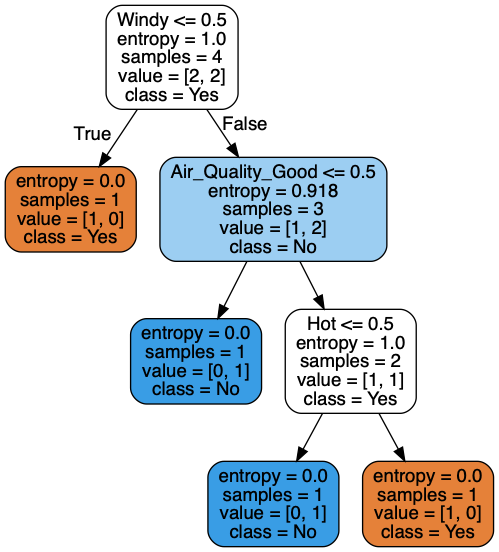

In [50]:
import pandas as pd
from IPython.core.display import display, Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Digraph
import pydotplus
data_raw = pd.read_csv("tennis.csv")
data = data_raw.replace({"Yes": 1, "No": 0})

x_columns = ["Windy", "Air_Quality_Good", "Hot"]
y_column = ["Play_Tennis"]

X = data[x_columns]
y = data[y_column]

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X,y)

DOT_data = export_graphviz(model, out_file=None, feature_names=x_columns, class_names=["Yes", "No"], filled=True, rounded=True)

py_graph = pydotplus.graph_from_dot_data(DOT_data)
png = Image(py_graph.create_png())
display(png)

**5b. SVM implementation on Breast Cancer Dataset**

In [51]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
y = pd.DataFrame(cancer.target, columns=['target'])
# print(X.head())
# print(y.head())
#
# print(X.shape)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=100)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

predicted = svm_classifier.predict(X_test)

print("\nAccuracy Score:")
print(accuracy_score(y_test, predicted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("\nClassification Report:")
print(classification_report(y_test, predicted))

print("\nSupport Vectors:")
print(svm_classifier.support_vectors_)

print("\nSupport Vector Indices")
print(svm_classifier.support_)

print("\nNumber of support vectors per class")
print(svm_classifier.n_support_)


Accuracy Score:
0.5701754385964912

Confusion Matrix:
[[ 0 49]
 [ 0 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.57      1.00      0.73        65

   micro avg       0.57      0.57      0.57       114
   macro avg       0.29      0.50      0.36       114
weighted avg       0.33      0.57      0.41       114


Support Vectors:
[[1.575e+01 1.922e+01 1.071e+02 ... 2.135e-01 4.245e-01 1.050e-01]
 [1.953e+01 1.890e+01 1.295e+02 ... 1.980e-01 2.968e-01 9.929e-02]
 [1.940e+01 1.818e+01 1.272e+02 ... 2.252e-01 3.590e-01 7.787e-02]
 ...
 [1.166e+01 1.707e+01 7.370e+01 ... 4.262e-02 2.731e-01 6.825e-02]
 [1.286e+01 1.800e+01 8.319e+01 ... 7.926e-02 2.779e-01 7.918e-02]
 [9.295e+00 1.390e+01 5.996e+01 ... 7.262e-02 3.681e-01 8.982e-02]]

Support Vector Indices
[  2   6   9  18  21  26  27  32  33  34  36  37  38  39  41  42  43  52
  53  55  57  58  71  74  77  81  82  87  90  91  93

Accuracy scores are not as good as we thought. Lets try to normalize the data and check the performance metrics again.
Normalizing the data to scale it from 0-1

In [52]:
X_min = X.min()
X_max = X.max()
X_range = (X_max - X_min)
X_scaled = (X - X_min)/X_range

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

linear_svm_classifier = SVC(kernel='linear')
linear_svm_classifier.fit(X_scaled_train, y_train)
predicted_scaled = linear_svm_classifier.predict(X_scaled_test)


print("\nAccuracy Score:")
print(accuracy_score(y_test, predicted_scaled))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_scaled))
print("\nClassification Report:")
print(classification_report(y_test, predicted_scaled))


Accuracy Score:
0.9649122807017544

Confusion Matrix:
[[45  4]
 [ 0 65]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       0.94      1.00      0.97        65

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



As we can see above, fitting the linear SVM on the scaled data gave us much better performance metrics

In [53]:
print("\nSupport Vectors:")
print(linear_svm_classifier.support_vectors_)

print("\nSupport Vector Indices")
print(linear_svm_classifier.support_)

print("\nNumber of support vectors per class")
print(linear_svm_classifier.n_support_)



Support Vectors:
[[0.45951063 0.35475144 0.43749568 ... 0.30024055 0.61344372 0.13898728]
 [0.18784609 0.3936422  0.19425057 ... 0.48934708 0.2757737  0.26905418]
 [0.39703725 0.44132567 0.38981411 ... 0.50721649 0.19534792 0.08684245]
 ...
 [0.34260968 0.61345959 0.33694976 ... 0.28243986 0.06406466 0.15033451]
 [0.30806001 0.42576936 0.29797526 ... 0.44054983 0.25744136 0.09268005]
 [0.30664016 0.30571525 0.30163776 ... 0.49037801 0.3849793  0.20733307]]

Support Vector Indices
[ 21  32  33  36  37  38  52  53  58  71  74  87 103 108 123 131 133 145
 168 185 189 202 279 309 313 321 326 330 332 367 398 399 404 411 425 429
 439 441 444   1  13  20  30  48  49  56  75  88  96 110 115 116 156 157
 196 197 201 204 248 249 254 258 282 297 305 322 328 331 333 344 346 383
 393 402 416 428 438 450]

Number of support vectors per class
[39 39]
